In [1]:
import pandas as pd 
import sklearn as sk
import numpy as np

import re
import string
import nltk
from nltk.corpus import stopwords

#Aca es donde tienen que poner el path asociado a donde tengan guardado
#el arhcivo del embedding de GLoVE. Tienen que bajarlo de:
#http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
path_glove='/home/tomas/organizacion_de_datos/tp2/glove.6B.100d.txt'

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM,GRU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split


/home/tomas/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/tomas/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/tomas/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/tomas/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: Futu

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/tomas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/tomas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/tomas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/tomas/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [20]:
from nltk.stem.snowball import SnowballStemmer

In [21]:
stemmer=SnowballStemmer(language='english')

In [22]:
def stemmizar_texto(texto):
    texto=' '.join([stemmer.stem(palabra) for palabra in texto.split() ])
    return texto


In [4]:
english_stopwords=set(stopwords.words('english'))

In [5]:
train_set=pd.read_csv("train.csv",encoding='utf-8')

In [6]:
test_set=pd.read_csv("test.csv",encoding='utf-8')

## Red neuronal profunda, NLP, preprocesamiento de texto, análisis realizado usando como único feature el texto del tweet

Análisis con preprocesamiento de los textos:
En el caso anterior se tomo simplemente los textos sin preprocesar. Que pasaria si remuevo las palabras mas comunes, las url que aparecen, las llamadas con arroba a otros usuarios, pues no tienen que ver con si el contenido del tweet es verdadero o no


### Procesamiento del texto

In [7]:
def quitar_stopwords(texto):
    texto=' '.join([word for word in texto.split() if word not in english_stopwords])
    return texto

In [8]:
def quitar_menciones(texto):
    texto=' '.join([palabra for palabra in texto.split() if '@' not in palabra])
    return texto

In [9]:
Diccionario_de_lenguaje_de_internet={
"2day": "Today",
"2moro": "Tomorrow",
"2nite": "Tonight",
"4EAE": "For Ever And Ever",
"ABT":"About",
"ADN": "Any Day Now",
"AFAIC": "As Far As I’m Concerned",
"AFAICT": "As Far As I Can Tell",
"AFAIK": "As Far As I Know",
"AFAIR": "As Far As I Remember",
"AKA": "Also Known As",
"AMA": "Ask Me Anything",
"ASAIC": "As Soon As I Can",
"ASAP": "As Soon As Possible",
"ATM": "At The Moment",
"B4": "Before",
"B4N": "Bye For Now",
"Bae": "Babe/Before Anyone Else",
"BBL": "Be Back Later",
"BBT": "Be Back Tomorrow",
"BCNU": "Be Seeing You",
"BD": "Big Deal",
"BF": "Boyfriend",
"BFF": "Best Friends Forever",
"BMT": "Before My Time",
"BOL": "Be On Later",
"BOT": "Back On Topic",
"BRB": "Be Right Back",
"BRO": "Brother",
"BT": "But",
"BTW": "By The Way",
"CFY": "Calling For You",
"CU": "See You",
"CUL": "See You Later",
"Cuz": "Because",
"CYA": "Cover Your Ass",
"DAE": "Does Anyone Else",
"DBA": "Doing Business As",
"DFTBA": "Don’t Forget To Be Awesome",
"DIKU": "Do I Know You",
"DM": "Direct Message",
"DND": "Do Not Disturb",
"DR": "Double Rainbow",
"DWBH": "Don’t Worry, Be Happy",
"ELI5": "Explain Like I’m 5",
"EOM": "End Of Message",
"EOS": "End Of Story",
"F2F": "Face To Face",
"FAQ": "Frequently Asked Question",
"FB": "Facebook",
"FBF": "Flash Back Friday",
"FF": "Follow Friday",
"FIFY": "Fixed It For You",
"FITB": "Fill In The Blank",
"FML": "Fuck My Life",
"FOMO": "Fear Of Missing Out",
"FTFY": "Fixed That For You",
"FTL": "For The Loss",
"FTW": "For The Win",
"FWB": "Friends With Benefits",
"FWIW": "For What It’s Worth",
"FYE": "For Your Entertainment",
"FYEO": "For Your Eyes Only",
"FYI": "For Your Information",
"GA": "Go Ahead",
"GAL": "Get A Life",
"GF": "Girlfriend",
"GM": "Good Morning",
"GN": "Good Night",
"Gr8": "Great",
"GTR": "Getting Ready",
"HAND": "Have A Nice Day",
"HB": "Hurry Back",
"HBD": "Happy Birthday",
"HBU": "How About You",
"HMB": "Hit Be Back",
"HMU": "Hit Me Up",
"HRU": "How Are You",
"HTH": "Hope This Helps",
"IAC": "In Any Case",
"IC": "I See",
"ICYMI": "In Case You Missed It",
"IDC": "I Don’t Care",
"IDK": "I Don’t Know",
"IG": "Instagram",
"IIRC": "If I Remember Correctly",
"IKR": "I Know Right",
"ILY": "I Love You",
"IMHO": "In My Humble Opinion",
"IMMD": "It Made My Day",
"IMY": "I Miss You",
"IRL": "In Real Life",
"IS": "I’m Sorry",
"ISO": "In Search Of",
"IU2U": "It’s Up To You",
"J4F": "Just For Fun",
"JAM": "Just A Minute",
"JFY": "Just For You",
"JIC": "Just In Case",
"JK": "Just Kidding",
"JSYK": "Just So You Know",
"KK": "Okay",
"L8": "Late",
"L8R": "Later",
"LMA": "Leave Me Alone",
"LMAO": "Laughing My Ass Off",
"LMBO": "Laughing My Butt Off",
"LMK": "Let Me Know",
"LOL": "Laugh Out Loud",
"LTNS": "Long Time No See",
"LYLAS": "Love You Like A Sister",
"M/F": "Male or Female",
"M8": "Mate",
"MP": "My pleasure",
"MSM": "Mainstream Media",
"MU": "Miss You",
"MYOB": "Mind Your Own Business",
"NAGI": "Not A Good Idea",
"NBD": "No Big Deal",
"NE1": "Anyone",
"NM": "Not Much",
"NP": "No Problem",
"NSFL": "Not Safe For Life",
"NSFW": "Not Safe For Work",
"NTS": "Note To Self",
"NVM": "Never Mind",
"OC": "Original Content",
"OH": "Overheard",
"OIC": "Oh ! I See",
"OMD": "Oh My Damn",
"OMG": "Oh My Goodness",
"OMW": "On My Way",
"OT": "Off Topic",
"OFC": "Of course",
"PAW": "Parents Are Watching",
"Pls": "Please",
"POTD": "Photo Of The Day",
"POV": "Point Of View",
"PPL": "People",
"PTB": "Please Text Back",
"Q4U": "Question For You",
"QQ": "Crying",
"RBTL": "Read Between The Lines",
"RIP": "Rest In Peace",
"RL": "Real Life",
"ROFL": "Rolling On the Floor Laughing",
"RT": "Retweet",
"RTM": "Read The Manual",
"SIS": "Sister",
"SITD": "Still In The Dark",
"SM": "Social Media",
"SMH": "Shaking My Head",
"SMY": "Somebody",
"SNH": "Sarcasm Noted Here",
"SOL": "Sooner Or Later",
"Some1": "Someone",
"SRSLY": "Seriously",
"STBY": "Sucks To Be You",
"Str8": "Straight",
"SYS": "See You Soon",
"TBA": "To Be Announced",
"TBH": "To Be Honest",
"TBT": "Throwback Thursday",
"TBT": "Truth Be Told",
"TFH": "Thread From Hell",
"TFTI": "Thanks For The Invite",
"TGIF": "Thank God It’s Friday",
"THX": "Thanks",
"TIA": "Thanks in Advance",
"TIL": "Today I Learned",
"TIME": "Tears In My Eyes",
"TL;DR": "Too Long; Didn’t Read",
"TLDR":"Too long didn’t read",
"TL DR":"Too long didn’t read",
"TLC": "Tender Loving Care",
"TMI": "Too Much Information",
"TTYL": "Talk To You Later",
"TTYS": "Talk To You Soon",
"Txt": "Text",
"TYVM": "Thank You Very Much",
"U": "You",
"U4F": "You Forever",
"UR": "Your",
"VBG": "Very Big Grin",
"VSF": "Very Sad Face",
"WB": "Welcome Back",
"WBU": "What About You?",
"WEG": "Wicked Evil Grin",
"WKND": "Weekend",
"WOM": "Word of Mouth",
"WOTD": "Word Of The Day",
"Wru": "Who Are You",
"WTH": "What The Heck?",
"WTPA": "Where The Party At?",
"WU?": "What's Up",
"WU":"What's Up",
"WYCM": "Will You Call Me?",
"WYWH": "Wish You Were Here",
"XOXO": "Hugs and Kisses",
"YGM": "You’ve Got Mail",
"YNK": "You Never Know",
"YOLO": "You Only Live Once",
"YT": "YouTube",
"YW": "You’re Welcome",
}

In [10]:
def reemplazar_lenguaje_internet(texto):
    texto=texto.upper()
    palabras=texto.split()
    palabras_procesadas=[]
    for palabra in palabras:
        traduccion=Diccionario_de_lenguaje_de_internet.get(palabra,'not internet slang')
        if(traduccion!='not internet slang'):
            lista_aux=traduccion.split()
            for x in lista_aux:
                palabras_procesadas.append(x.lower())
        else:
            palabras_procesadas.append(palabra.lower())
    texto=' '.join([word for word in palabras_procesadas])
    return texto

In [11]:
#es necesario importar la libreria re (regular expression) para poder usar esta funcion
#ya esta bajada en el comienzo del notebook pero si lo que quieren es analizar la documentación
#lo pueden revisar en google
#falta borrar los arroba
def limpiar_texto(texto):
    texto = reemplazar_lenguaje_internet(texto)
    texto=texto.lower()
    texto = re.sub('\[.*?\]', '', texto) # remove text in square brackets
    texto = re.sub('https?://\S+|www\.\S+', '', texto) # remove URLs
    texto = re.sub('<.*?>+', '', texto) # remove html tags
    texto = re.sub('[%s]' % re.escape(string.punctuation), '', texto) # remove punctuation
    texto = re.sub('\n', '', texto) # remove words conatinaing numbers
    texto = re.sub('\w*\d\w*', '', texto)
    texto = re.sub('[‘’“”…]', '', texto)
    texto = quitar_stopwords(texto)
    texto = quitar_menciones(texto)
    return texto

In [25]:
from nltk import WordNetLemmatizer

In [26]:
lemmatizer=WordNetLemmatizer()

In [27]:
def lemmatizar_texto(texto):
    lista_palabras=nltk.word_tokenize(texto)
    texto=' '.join([lemmatizer.lemmatize(word) for word in lista_palabras])
    return texto
#nota: la función esta definida aca, pero para ver los resultados que produce hay
#que ir al comienzo del notebook y ejecutar la celda de lemmatizar texto luego
#de haber limpiado el texto original

In [28]:
from nltk.corpus import wordnet

def get_wordnet_pos(palabra):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([palabra])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)



In [29]:
def lemmatizar_con_pos(texto):
    lista_palabras=texto.split()
    texto=' '.join(lemmatizer.lemmatize(palabra,get_wordnet_pos(palabra)) for palabra in lista_palabras)
    return texto

prueba = "The striped bats are hanging on their feet for best"
print(lemmatizar_con_pos(prueba))

The strip bat be hang on their foot for best


In [12]:
train_set['text']=train_set['text'].apply(limpiar_texto)

In [13]:
train_set['text']

0            deeds reason earthquake may allah forgive us
1                   forest fire near la ronge sask canada
2       residents asked shelter place notified officer...
3       people receive wildfires evacuation orders cal...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    ariaahrary thetawniest control wild fires cali...
7610                                       volcano hawaii
7611    police investigating ebike collided car little...
7612    latest homes razed northern california wildfir...
Name: text, Length: 7613, dtype: object

Nota: las siguientes 3 secciones (stemming, lemmatization, lemmatization con POS) son mutuamente exclusivas. No ejecutar una luego de la otra, elegir sólo la que se queiere usar

#### Aplicación de stemming

In [26]:
train_set['text']=train_set['text'].apply(stemmizar_texto)

In [27]:
train_set['text']

0               deed reason earthquak may allah forgiv us
1                    forest fire near la rong sask canada
2       resid ask shelter place notifi offic evacu she...
3             peopl receiv wildfir evacu order california
4       got sent photo rubi alaska smoke wildfir pour ...
                              ...                        
7608       two giant crane hold bridg collaps nearbi home
7609    ariaahrari thetawniest control wild fire calif...
7610                                       volcano hawaii
7611    polic investig ebik collid car littl portug eb...
7612    latest home raze northern california wildfir a...
Name: text, Length: 7613, dtype: object

#### Aplicación de lemmatization

In [71]:
train_set['text']=train_set['text'].apply(lemmatizar_texto)

In [125]:
train_set['text'][18]

'car fast'

#### Aplicación de lemmatization con POS

In [30]:
train_set['text']=train_set['text'].apply(lemmatizar_con_pos)

In [98]:
train_set['text']

0              deed reason earthquake may allah forgive u
1                   forest fire near la ronge sask canada
2       resident ask shelter place notify officer evac...
3       people receive wildfire evacuation order calif...
4       get sent photo ruby alaska smoke wildfire pour...
                              ...                        
7608     two giant crane hold bridge collapse nearby home
7609    ariaahrary thetawniest control wild fire calif...
7610                                       volcano hawaii
7611    police investigate ebike collide car little po...
7612    late home raze northern california wildfire ab...
Name: text, Length: 7613, dtype: object

## Red neuronal profunda, usando NLP, aplicando un embedding pre entrenado

#### Creación de la matriz de pesos

In [36]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

#### Preparación de los tweets para ser usados en la red neuronal

In [33]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM,GRU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [34]:
X=train_set['text'].copy().values
Y=train_set['target'].copy().values
#separamos el train set en dos, un conjunto de entrenamiento y uno de validacion, ratio: 80-20
X_para_entrenar,X_para_evaluar,Y_para_entrenar,Y_para_evaluar=train_test_split(X,Y,test_size=0.2,random_state=1000)

#se hace un análisis del target usando NLP
X_train=X_para_entrenar
Y_train=Y_para_entrenar
X_test=test_set['text'].copy().values

print("Shape de X_train: "+ str(X_train.shape))
print("Shape de X_test:" + str(X_test.shape))
todos_los_textos=np.concatenate([X_train,X_test])
print("Shape de todos_los_textos:" + str(todos_los_textos.shape))

#estan todos los textos concatenados, hay que 'entrenar' al tokenizador
objeto_tokenizador=Tokenizer()
objeto_tokenizador.fit_on_texts(todos_los_textos)

#necesito una cota de la longitud de cada palabra de los textos que 
#se van a analizar
longitud_maxima=max([len(s.split()) for s in todos_los_textos])
print("longitud maxima: " + str(longitud_maxima))

#necesito saber cuantas palabras tengo en mi 'diccionario' de palabras
tamanio_de_vocabulario=len(objeto_tokenizador.word_index) +1
print("tamanio de vocabulario: " + str(tamanio_de_vocabulario))

#ahora que tengo esto, es tiempo de tokenizar cada uno de los tweets
#y agregar el padding necesario
X_train_tokens=objeto_tokenizador.texts_to_sequences(X_train)
X_train_pad=pad_sequences(X_train_tokens,maxlen=longitud_maxima,padding='post')

X_test_tokens=objeto_tokenizador.texts_to_sequences(X_test)
X_test_pad=pad_sequences(X_test_tokens,maxlen=longitud_maxima,padding='post')

X_para_evaluar=pad_sequences(objeto_tokenizador.texts_to_sequences(X_para_evaluar),maxlen=longitud_maxima,padding='post')

Shape de X_train: (6090,)
Shape de X_test:(3263,)
Shape de todos_los_textos:(9353,)
longitud maxima: 31
tamanio de vocabulario: 21096


#### Creación de la matriz de pesos, y cálculo de la cobertura dada por GLoVE

In [22]:
#Aca es donde uso el embedding entrenado por GLoVE
#Primero creo una matriz donde estan los pesos asociados 
#a las palabras
dimension_embedding=100
embedding_matrix = create_embedding_matrix(path_glove,objeto_tokenizador.word_index, dimension_embedding)


nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
print(nonzero_elements/tamanio_de_vocabulario)

0.61066352855979


#### Stemming

En este momento las palabras que aparecen en los tweets tienen una cobertura de 61%. Esto quiere decir que 39% de las palabras que aparecen en los tweets no se encuentran presentes en los embeddings de glove -> el valor de esas palabras en la matriz de pesos que se genero anteriormente va a ser cero (cosa que no es deseable). Para solucionar esto voy a aplicarle a cada tweet el proceso de stemming

Stemming se basa en la reducción de cada palabra en los tweets a su raiz idiomatica (ejemplo: computer ----> compute )

##### Importamos la libreria que se encarga de hacer el stemming (requiere NLTK)

Veamos ahora si hubo una mejora en la cobertura brindada por glove

In [30]:
dimension_embedding=100
embedding_matrix = create_embedding_matrix(path_glove,objeto_tokenizador.word_index, dimension_embedding)


nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
print(nonzero_elements/tamanio_de_vocabulario)

0.5338266384778013


Como puede verse, la cobertura brindada por glove es todavia peor que antes, habiendose producido una reducción de la cobertura de 61% a 53%. Menor cobertura va a dar lugar a peores resultados, por lo que utilizar stemming en este caso no es buena idea.

#### Lemmatization

Stemming no dio el resultado que se esperaba, voy a aplicar lemmatization que es mejor que stemming, ya que hace un análsis morfologico de las palabras (stemming basicamente lo que hace es corta partes de la palabra original)

Habiendo lemmatizado el texto en lugar de hacer stemming, veamos la cobertura que se consigue

In [76]:
dimension_embedding=100
embedding_matrix = create_embedding_matrix(path_glove,objeto_tokenizador.word_index, dimension_embedding)


nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
print(nonzero_elements/tamanio_de_vocabulario)

0.6026793992212127


La cobertura es del 60%, mejor que lo que se consigue usando stemming, pero sigue siendo peor que si no se le hubiera aplicado ninguno de los dos procesos al texto original.

#### Lemmatization modificado, usando POS (part of speech)

Probamos ahora que cobertura conseguimos usando lemmatizar con POS

In [39]:
dimension_embedding=100
embedding_matrix = create_embedding_matrix(path_glove,objeto_tokenizador.word_index, dimension_embedding)


nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
print(nonzero_elements/tamanio_de_vocabulario)

0.60257868790292


me da 60%, todavia más bajo que si no hubiera aplicado nada

#### Creación de la red neuronal

In [78]:
def crear_modelo(num_filtros,tamanio_kernel,tamanio_vocab,dimension_embedding,max_len):
    red_neuronal=Sequential()
    red_neuronal.add(Embedding(tamanio_de_vocabulario,dimension_embedding,weights=[embedding_matrix],input_length=longitud_maxima))
    red_neuronal.add(layers.Conv1D(128,5,activation='relu'))
    red_neuronal.add(layers.GlobalMaxPool1D())
    red_neuronal.add(layers.Dense(100,activation='relu'))
    red_neuronal.add(layers.Dense(1,activation='sigmoid'))
    red_neuronal.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return red_neuronal

param_grid=dict(num_filtros=[32,64,128],tamanio_kernel=[3,5,7],tamanio_vocab=[tamanio_de_vocabulario],dimension_embedding=[dimension_embedding],max_len=[longitud_maxima])

In [84]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

#settings:
epochs=20
#longitud_maxima (calculada antes)
#embedding dimension(calculada antes)
output_file='output.txt'

modelo=KerasClassifier(build_fn=crear_modelo,epochs=epochs,batch_size=10,verbose=False)
grid=RandomizedSearchCV(estimator=modelo, param_distributions=param_grid,cv=4,verbose=1,n_iter=5)

grid_result=grid.fit(X_train_pad,Y_train)

#evaluando los resultados:
#precision_de_prueba=grid.score(X_para_evaluar,Y_para_evaluar)

prompt = input(f'finished; write to file and proceed? [y/n]')
if prompt.lower() in {'y','true','yes'}:
    with open(output_file, 'a') as f:
        s=('Best Accuracy : ' '{:.4f}\n{}\nTest Accuracy : {:.4f}\n\n')
        output_string=s.format(grid_result.best_score_,grid_result.best_params_,test_accuracy)
        print(output_string)
        f.write(output_string)


Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 99.6min finished


finished; write to file and proceed? [y/n]y


FileNotFoundError: [Errno 2] No such file or directory: 'data/output.txt'

In [2]:
output_file='output.txt'
with open(output_file,'a') as f:
    f.write("funciono")

In [42]:
history=red_neuronal.fit(X_train_pad,Y_train,epochs=20,verbose=False,validation_data=(X_para_evaluar,Y_para_evaluar),batch_size=100)

In [43]:
loss,accuracy=red_neuronal.evaluate(X_train_pad,Y_train,verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = red_neuronal.evaluate(X_para_evaluar, Y_para_evaluar, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9844
Testing Accuracy:  0.7879


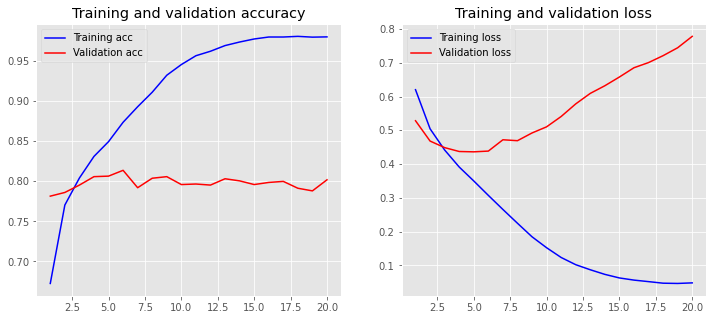

In [105]:
plot_history(history)

# Realizar predicción y creacion del submit

In [37]:
#ahora se hace la prediccion
predicciones=red_neuronal.predict(X_test_pad)

In [38]:
resultado=[]
for numero in predicciones:
    if numero>=0.5:
        resultado.append(1)
    else:
        resultado.append(0)

In [39]:
sampleSubmission=pd.read_csv('sample_submission.csv')
output=pd.DataFrame({'id':sampleSubmission.id,'target':resultado})
output.to_csv('submission.csv',index=False)